Exercise 2
Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
- Layer 1: 8 nodes
- Layer 2: 5 nodes
- Layer 3: 2 nodes
- Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as kb
import keras

In [70]:
data = pd.read_csv(filepath_or_buffer=r'./wine.csv')
X = data.drop(columns=['Class'])
y = data['Class']
y = pd.get_dummies(y)

In [71]:
stdsclr = StandardScaler()
X = stdsclr.fit_transform(X)

In [108]:
model = Sequential()
model.add(Dense(units=8, input_shape=(X.shape[1],), 
                kernel_initializer=keras.initializers.he_normal(seed=None),
                activation='tanh'))
model.add(Dense(units=5, activation='tanh'))
model.add(Dense(units=2, activation='tanh'))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, validation_split=.2, batch_size=8, epochs=20)

Train on 142 samples, validate on 36 samples
Epoch 1/20
142/142 [==============================] - 3s 22ms/step - loss: 0.5459 - acc: 0.8028 - val_loss: 2.7289 - val_acc: 0.0000e+00
Epoch 2/20
142/142 [==============================] - 0s 621us/step - loss: 0.2812 - acc: 0.8944 - val_loss: 1.8414 - val_acc: 0.0000e+00
Epoch 3/20
142/142 [==============================] - 0s 563us/step - loss: 0.1657 - acc: 0.9366 - val_loss: 0.8325 - val_acc: 0.8889
Epoch 4/20
142/142 [==============================] - 0s 592us/step - loss: 0.1102 - acc: 0.9648 - val_loss: 0.8248 - val_acc: 0.8056
Epoch 5/20
142/142 [==============================] - 0s 648us/step - loss: 0.0840 - acc: 0.9718 - val_loss: 1.0005 - val_acc: 0.7500
Epoch 6/20
142/142 [==============================] - 0s 648us/step - loss: 0.1077 - acc: 0.9789 - val_loss: 0.3455 - val_acc: 0.9444
Epoch 7/20
142/142 [==============================] - 0s 622us/step - loss: 0.2012 - acc: 0.9366 - val_loss: 0.1395 - val_acc: 1.0000
Epoch 8/20

In [109]:
layer1 = model.layers[0].input
layer3 = model.layers[2].output

In [110]:
function = kb.function(inputs=[layer1], outputs=[layer3])

In [111]:
two_dim_output = function([X])[0]

In [112]:
two_dim_output.shape

(178, 2)

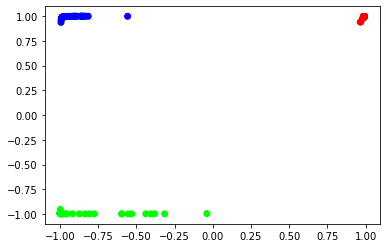

In [113]:
plt.scatter(two_dim_output[:, 0], two_dim_output[:, 1], c=y)